In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# load data
data = np.loadtxt("hw2_q2.csv",delimiter=",", dtype=None)

# place data into numpy matrices
x = np.array(data[:, 0])
y = np.array(data[:, 1])

#define constants
n = np.size(x)
d = 5

In [3]:
# create design matrix for polynomial regression
X = np.vstack([np.ones(100), x, x**2, x**3, x**4, x**5]).T

In [4]:
# formal solution to polyreg
# w_2 = np.linalg.inv(X.T @ X) @ X.T @ y
w = np.linalg.lstsq(X,y,rcond=None)[0]
w

array([ 2.25366827e+01, -2.79653612e+01,  1.14449172e+01, -1.79121000e+00,
        8.40887804e-02,  1.22917549e-03])

In [5]:
# compute unbiased noise variance
unbiased_noise_variance = (1 / (n - (d + 1))) * sum((y - X @ w)**2)

In [6]:
# compute mle estimate of noise variance (biased)
mle_noise_variance = (1 / n) * (y - X @ w).T @ (y - X @ w)

In [7]:
# function for multivariate joint gaussian probability distribution
def jprob(sigma_2):
    value = (2* sigma_2 * np.pi)**(-n / 2) * np.e**( (-1 / (2 * sigma_2)) * (y - X @ w).T @ (y - X @ w))
    return value

In [8]:
# compute the joint probability distribution for many values of sigma_2

# make jprob into a function that can apply to each element of a vector
vjprob = np.vectorize(jprob)

# make array of reasonable sigma_2 values for the graph of the probability distribution
x_probdist = np.arange(50,150,1)

# create vector containing values of the probability distribution
y_probdist = vjprob(x_probdist)

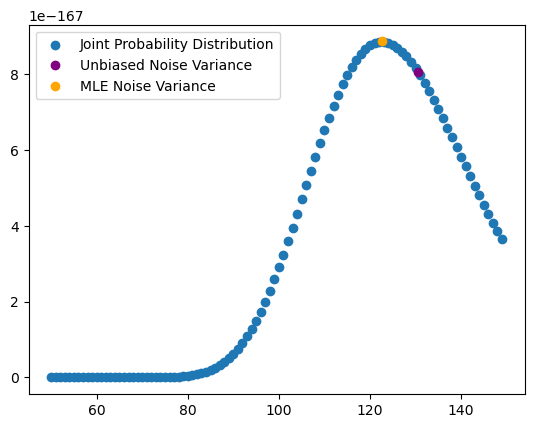

In [12]:
# graph sigma_2 against joint probability distribution, mark unbiased + mle estimates
plt.scatter(x_probdist,y_probdist, label = 'Joint Probability Distribution')
plt.scatter(unbiased_noise_variance, vjprob(unbiased_noise_variance), c='Purple', label = 'Unbiased Noise Variance')
plt.scatter(mle_noise_variance, vjprob(mle_noise_variance), c='Orange', label = 'MLE Noise Variance')
plt.legend()

we can say that the estimate of the variance is larger in the case of unbiased estimation versus MLE estimation, but that the likelihood of the MLE noise variance is higher in this model.

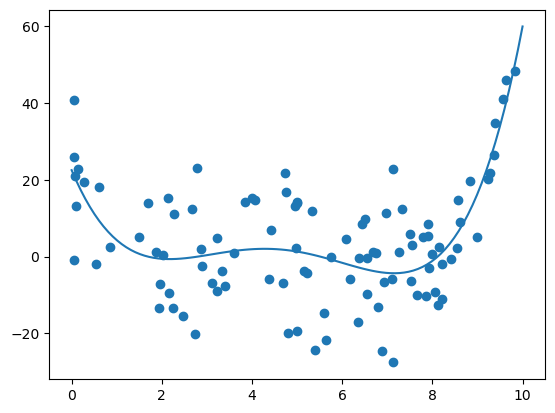

In [10]:
# graph regression problem
ax = plt.axes()
ax.scatter(x,y)
x_axis = np.linspace(0,10, num=100)
ax.plot(x_axis, np.vstack([np.ones(100), x_axis, x_axis**2, x_axis**3, x_axis**4, x_axis**5]).T @ w)

In [15]:
sum((y - X @ w)**2)

12262.837501226639